In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext autotime

time: 0 ns


# Evaluation

This notebook shows visual examples generated by the model, and compares those to their reference.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from model import TransposeCNN, parse_images

time: 5.17 s


In [4]:
model = TransposeCNN()

Model: "TransposeCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (Dense)          (None, 32768)             196608    
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 128)       0         
_________________________________________________________________
batch_norm_init (BatchNormal (None, 16, 16, 128)       512       
_________________________________________________________________
ReLU_init (ReLU)             (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_t_layer1 (Conv2DTrans (None, 32, 32, 128)       262144    
_________________________________________________________________
batch_norm_layer1 (BatchNorm (None, 32, 32, 128)       512       
_________________________________________________________________
ReLU_layer1 (ReLU)           (None, 32, 32, 128)      

C:\Users\Ruben\Documents\Projects\BlenderCNN\model.py:74: UserWarning: Model loaded successfully!
  warn("Model loaded successfully!")


In [5]:
img_names = [f"sample_{i}" for i in range(1, 10001)]

time: 16 ms


In [6]:
features, values = parse_images(img_names)

Parsing images...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 225.87it/s]

time: 44.4 s


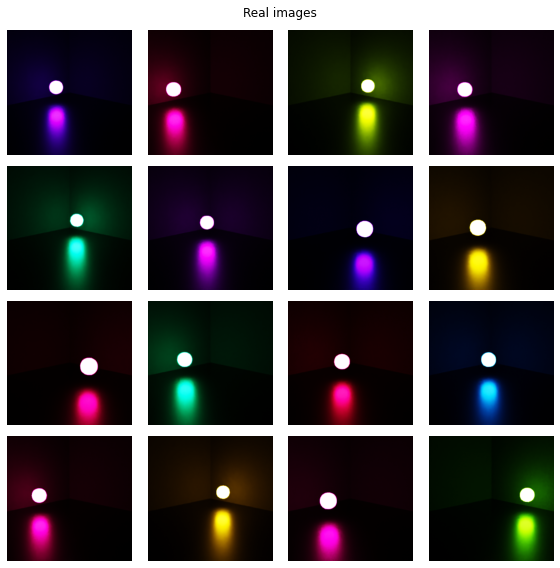

time: 1.33 s


In [12]:
fig=plt.figure(figsize=(8, 8))
for i in range(4*4):
    ax = plt.subplot(4, 4, i+1)
    ax.set_aspect('equal')
    plt.imshow(values[200+i])
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.suptitle('Real images')
plt.tight_layout()
plt.savefig('images/sample_real.png', bbox_inches='tight')

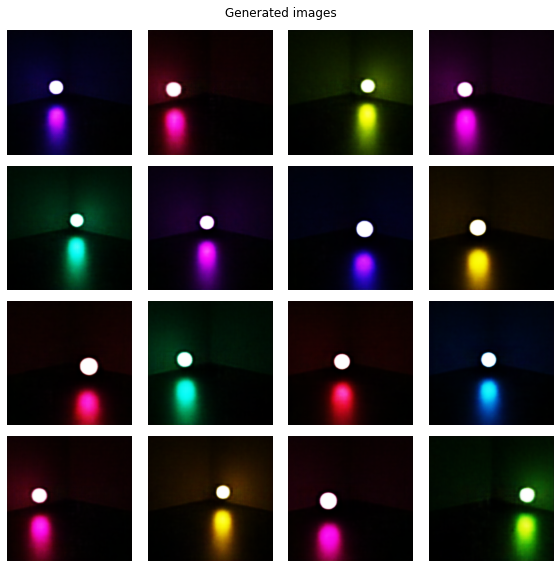

time: 1.22 s


In [13]:
images = model(features[200:216])
fig=plt.figure(figsize=(8, 8))
for i in range(4*4):
    ax = plt.subplot(4, 4, i+1)
    ax.set_aspect('equal')
    plt.imshow(images[i])
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.suptitle('Generated images')
plt.tight_layout()
plt.savefig('images/sample_generated.png', bbox_inches='tight')

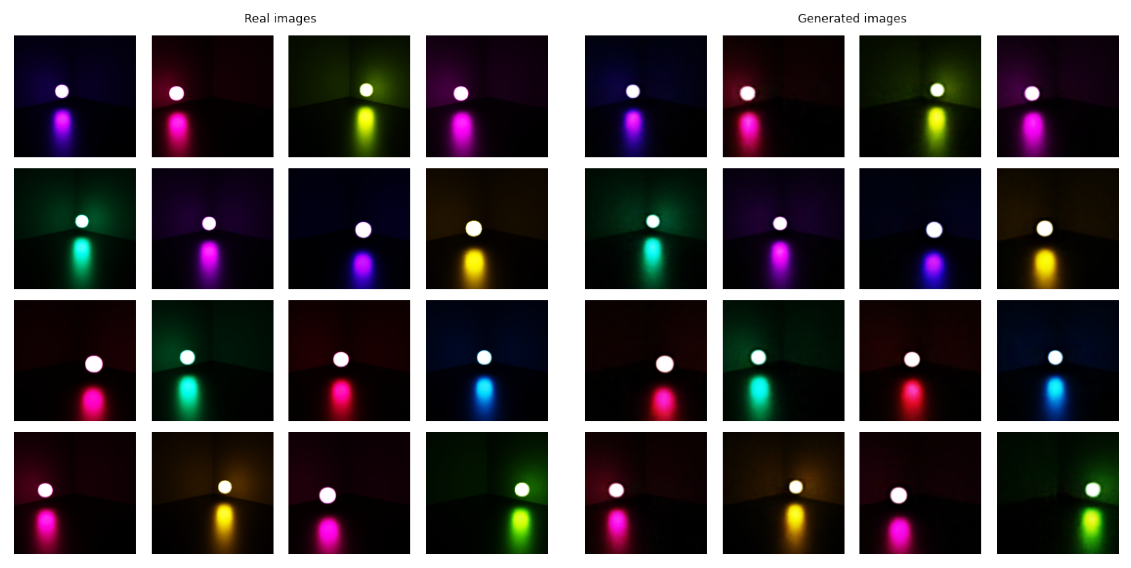

time: 890 ms


In [14]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(plt.imread('images/sample_real.png'))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(plt.imread('images/sample_generated.png'))
plt.axis('off')
plt.tight_layout()
plt.savefig('images/sample_combined.png', bbox_inches='tight')